In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
data = pd.read_csv('/content/ortho_knnnb.csv')

In [3]:
# Showing overview of the dataset
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
#How many variables does the dataset contain?
print("Column Names:",data.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


What is the data about?
What are we trying to predict here? 

Classifying patients based on six features
pelvic incidence
pelvic tilt
lumbar lordosis angle
sacral slope
pelvic radius
grade of spondylolisthesis

In [5]:
#Perform some descriptive statistics and make a note of your findings
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
# Plot appropriate graphs to understand the relation between the variables.
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


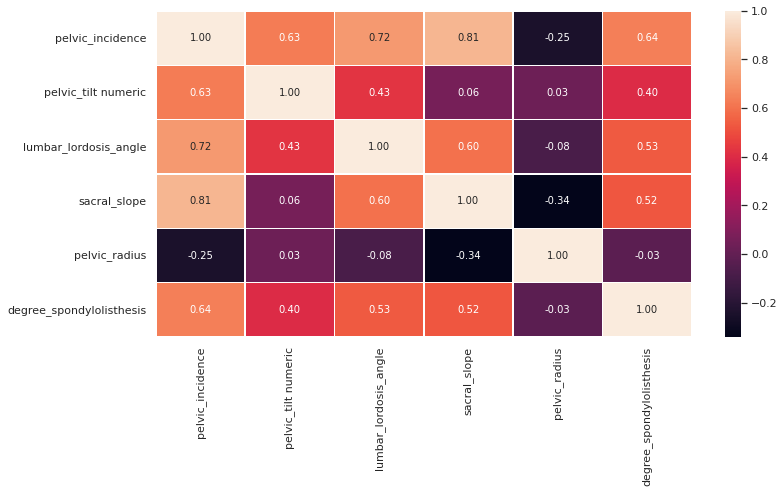

In [7]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(data.corr(), annot=True, fmt=".2f",linewidths=.5,ax=ax)
plt.show()

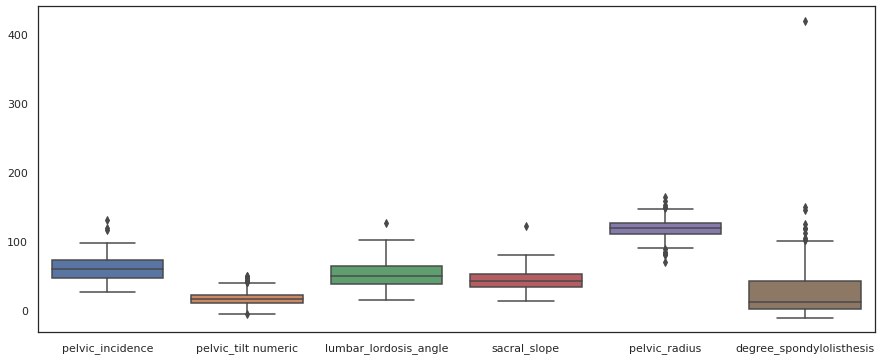

In [8]:
df=data.drop(['class'],axis=1) #Predictors
plt.figure(figsize=(15,6))
sns.boxplot(data=df,orient='v')
plt.show()

In [9]:
df1=data[data['degree_spondylolisthesis']>100]
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,Abnormal
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Abnormal
76,86.753609,36.043016,69.221045,50.710593,139.414504,110.860782,Abnormal
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,Abnormal
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Abnormal


In [10]:
df1=data[data['degree_spondylolisthesis']<400]
df1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


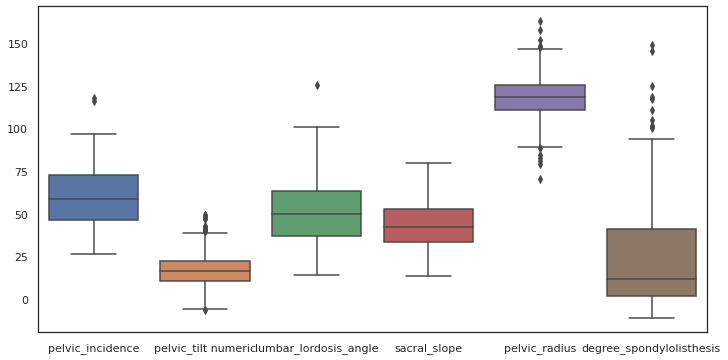

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1,orient='v')
plt.show()


In [12]:
Q1 = np.percentile(data['degree_spondylolisthesis'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['degree_spondylolisthesis'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['degree_spondylolisthesis'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -57.696049181250004
upper limit: 100.46063028475001


In [13]:
data = data[data['degree_spondylolisthesis']< up_lim]
data=data[data['degree_spondylolisthesis']> low_lim]

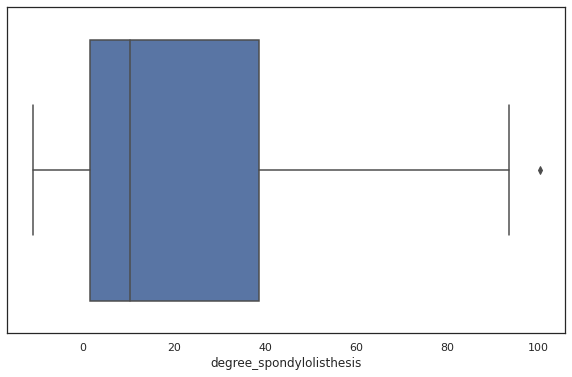

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data['degree_spondylolisthesis'])
plt.show()

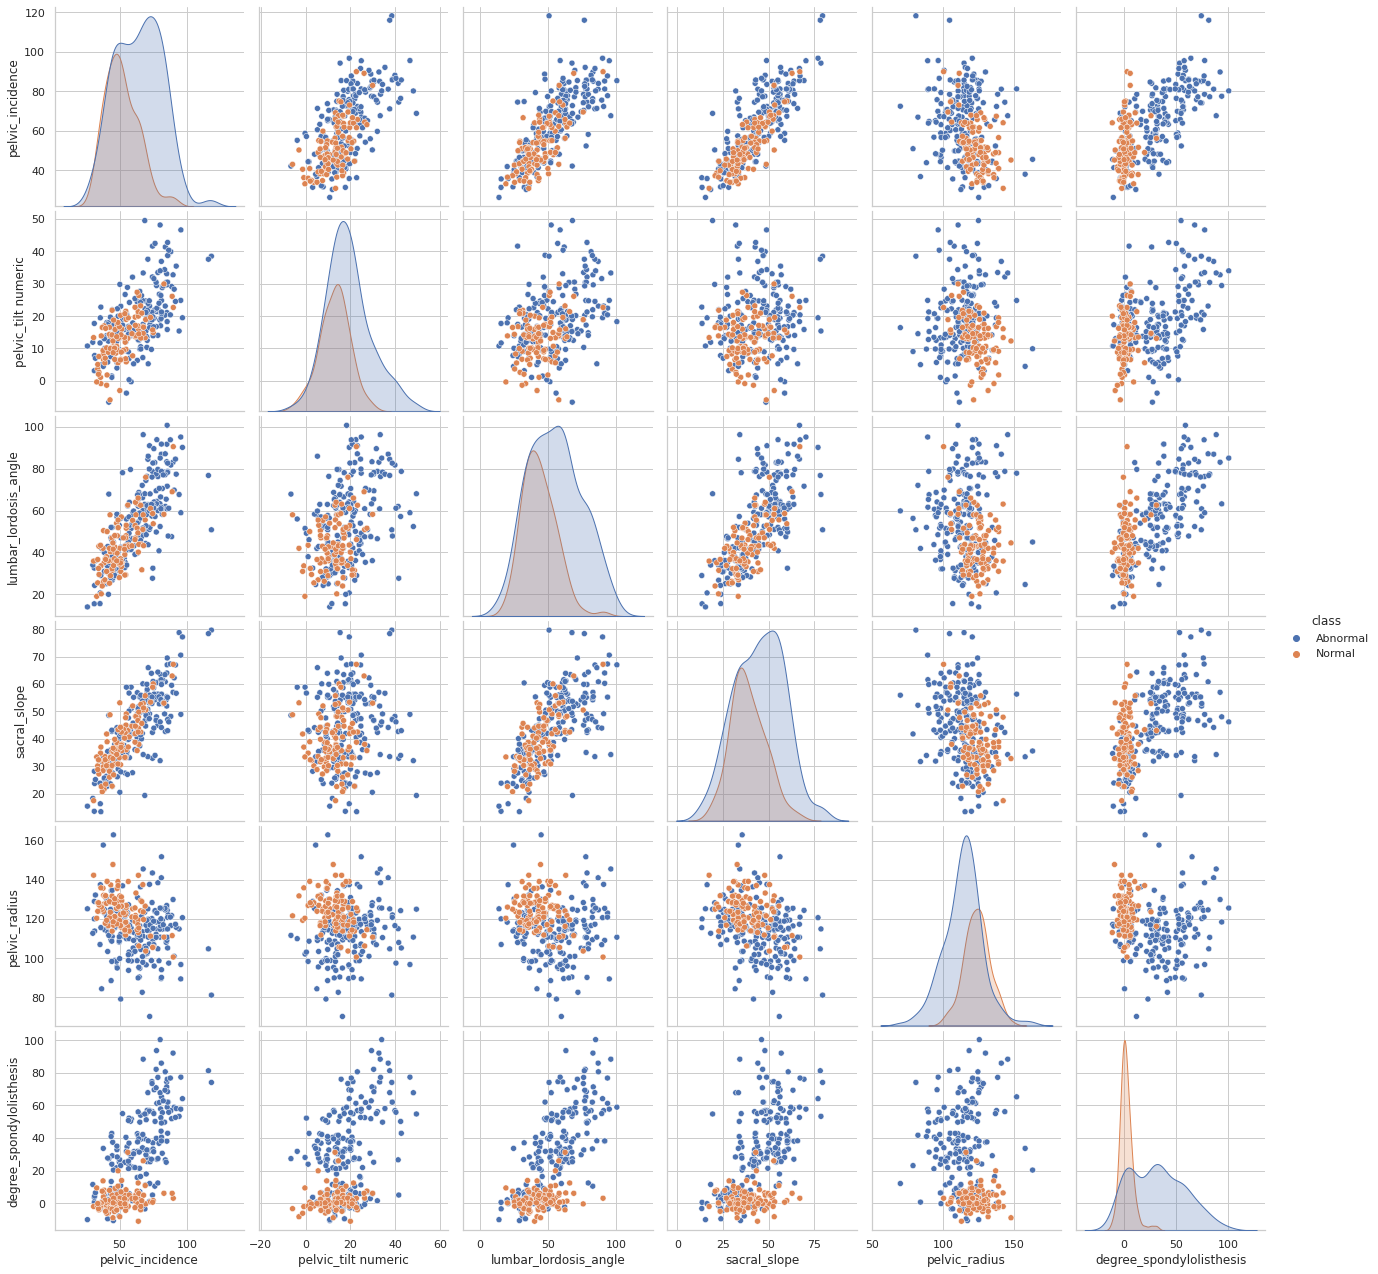

In [15]:
#Point out any observations and comment on the strength of the relationships if any.
sns.set_style("whitegrid");
sns.pairplot(data, hue="class", size=3);
plt.show()

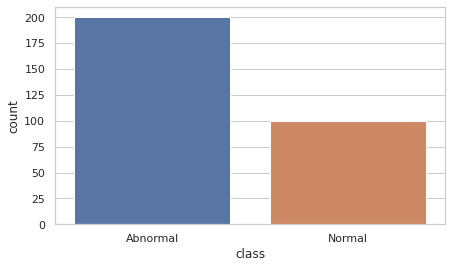

In [16]:
plt.figure(figsize=(7,4))
sns.countplot('class', data=data)
plt.show()

In [17]:
# Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column
symptom_class=df1['class'] = df1['class'].map(
                   {'Abnormal':1 ,'Normal':0})

# show the dataframe
df1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [18]:
X=df1.drop(['class'],axis=1) 

Y=df1['class'].values 

In [19]:
#Normalize the variables.
from sklearn import preprocessing
normalized = preprocessing.normalize(X)
print("Normalized Data = ", normalized)

Normalized Data =  [[ 0.47747441  0.17084969  0.30006338  0.30662473  0.74750793 -0.00192724]
 [ 0.30683541  0.07904018  0.19652338  0.22779523  0.89878075  0.03585728]
 [ 0.47319951  0.1527454   0.34436881  0.32045411  0.72861603 -0.02426987]
 ...
 [ 0.39893156  0.14734321  0.29975311  0.25158834  0.81589576 -0.01758045]
 [ 0.32622463  0.06266844  0.29977024  0.26355619  0.85458978  0.00154812]
 [ 0.24745062  0.03710111  0.26792128  0.21034951  0.9062896  -0.00145691]]


In [20]:
#Use train_test_split from sklearn and split the parameters and classes into train and test sets
from sklearn.model_selection import train_test_split,StratifiedKFold
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print('X_train dim:', x_train.shape)
print('X_test dim:',x_test.shape)

X_train dim: (247, 6)
X_test dim: (62, 6)


In [21]:
#Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [22]:
#Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.
KNN_1 = KNeighborsClassifier(n_neighbors=8)
KNN_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [23]:
# Predict Species for test data
pred = KNN.predict(x_test)
pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [24]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the KNN with K=3 is 85.48%


In [25]:
# Predict Species for test data
pred_1 = KNN_1.predict(x_test)
pred_1

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [26]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN_1 with K=8 is {}%'.format(round(accuracy_score(pred_1,y_test)*100,2)))

The accuracy of the KNN_1 with K=8 is 91.94%


In [27]:
k=KNeighborsClassifier(n_neighbors=20)
k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [28]:
# Predict Species for test data
pred_k = k.predict(x_test)
pred_k

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [29]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=20 is {}%'.format(round(accuracy_score(pred_k,y_test)*100,2)))

The accuracy of the KNN with K=20 is 88.71%


In [30]:
# fit a Naive Bayes Classifier to the same data.
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [31]:
#Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
print(y_pred)

[0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0]


In [34]:
#lets see the actual and predicted value 
test = x_test.reset_index(drop = True)
test["class_pred"] = y_pred
test["class_pred"].head()

0    0
1    1
2    1
3    0
4    0
Name: class_pred, dtype: int64

In [35]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [36]:

print('The accuracy  is {}%'.format(round(accuracy_score(y_pred,y_test)*100,2)))

The accuracy  is 77.42%
